## Author# Ganesh Kale
## Week# 5 & 6
## Date# Oct 01, 2021

#### _import required packages_

In [1]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import packages required for webscraping

import requests
from bs4 import BeautifulSoup

### Exercise - 1

### Extract table from html page

In [2]:
# html page path

page_path = "/Users/ganeshkale/work/dsc540_data_prep/Data/wikipedia_gdp.html"

# open the html page

with open(page_path, 'r') as fh:
    
    soup = BeautifulSoup(fh)   # create bs4 instance by passing filehandler
    
    tables = soup.find_all('table')     # find all the tables   

In [3]:
# total table in html page

print(len(tables))

9


In [4]:
# get the appropriate table from all tables using class

wiki_table = soup.find('table', attrs={'class':'"wikitable"|}'})

In [5]:
# get all the rows under table element

all_rows = wiki_table.tbody.findAll('tr')

In [6]:
# get the sources names 

sources_list = []

for td in all_rows[0].findAll('td'):    # all_rows - contains sources row and actual table rows, here we get sources row at 0 index
    sources_list.append(td.find('a').getText())      # find tag a and get text as source
    
# display the sources names
sources_list

['International Monetary Fund', 'World Bank', 'United Nations']

In [7]:
# get data and headers for each sources and store in dict

data_tables = {}
headers = {}

count = 0
for table in all_rows[1].findAll('table'):     # get the table details 
    temph = []
    tempd = []
    for head in table.find('thead').findAll('th'):     # find head and header for each table
        temph.append(head.getText().strip())            # strip header new line char and store in list 
    headers['head'+str(count)] = temph                  # store each table header in dict as list
    
    for row in table.tbody.find_all('tr'):            # get table rows for each table
        tempd.append([td.getText().strip() for td in row.find_all('td')])      # store data for each table in temp list
    data_tables['table'+str(count)] = tempd           # store data as list
    count+=1

In [8]:
# display headers of table

headers

{'head0': ['Rank', 'Country', 'GDP(US$MM)'],
 'head1': ['Rank', 'Country', 'GDP(US$MM)'],
 'head2': ['Rank', 'Country', 'GDP(US$MM)']}

In [9]:
# display data for each table - few rows

for idx, data in data_tables.items():
    print("\n Top 5 rows for table",idx)
    data[:5]


 Top 5 rows for table table0


[['', 'World[19]', '79,865,481'],
 ['1', 'United States', '19,390,600'],
 ['2', 'China[n 1]', '12,014,610'],
 ['3', 'Japan', '4,872,135'],
 ['4', 'Germany', '3,684,816']]


 Top 5 rows for table table1


[['', 'World', '7007806837870000000♠80,683,787'],
 ['1', 'United States', '7007193906040000000♠19,390,604'],
 ['', 'European Union[23]', '7007172776980000000♠17,277,698'],
 ['2', 'China[n 4]', '7007122377000000000♠12,237,700'],
 ['3', 'Japan', '7006487213700000000♠4,872,137']]


 Top 5 rows for table table2


[['', 'World[24]', '7007756484480000000♠75,648,448'],
 ['1', 'United States', '7007186244750000000♠18,624,475'],
 ['2', 'China[n 4]', '7007112182810000000♠11,218,281'],
 ['3', 'Japan', '7006493621100000000♠4,936,211'],
 ['4', 'Germany', '7006347779600000000♠3,477,796']]

In [10]:
# for table 2 and 3 we see GDP value is not correct and need to be cleaned

cleaned_data_tables = {}

for idx, data in data_tables.items():
    if idx != 'table0':
        temp = []
        for item in data:
            gdp_val = item[2].split('♠')[1]
            temp.append(item[:2]+[gdp_val])
        cleaned_data_tables[idx] = temp
    else:
        cleaned_data_tables[idx] = data

In [11]:
# display data for each table - few rows

for idx, data in cleaned_data_tables.items():
    print("\n Top 5 rows for table",idx)
    data[:5]


 Top 5 rows for table table0


[['', 'World[19]', '79,865,481'],
 ['1', 'United States', '19,390,600'],
 ['2', 'China[n 1]', '12,014,610'],
 ['3', 'Japan', '4,872,135'],
 ['4', 'Germany', '3,684,816']]


 Top 5 rows for table table1


[['', 'World', '80,683,787'],
 ['1', 'United States', '19,390,604'],
 ['', 'European Union[23]', '17,277,698'],
 ['2', 'China[n 4]', '12,237,700'],
 ['3', 'Japan', '4,872,137']]


 Top 5 rows for table table2


[['', 'World[24]', '75,648,448'],
 ['1', 'United States', '18,624,475'],
 ['2', 'China[n 4]', '11,218,281'],
 ['3', 'Japan', '4,936,211'],
 ['4', 'Germany', '3,477,796']]

In [12]:
# create dataframe for each source data

all_dfs = []   # store all three dfs

for i in range(3):
    print('The GDP Data Table for Source: ',sources_list[i])
    print('*'*60, '\n')
    df = pd.DataFrame(data = cleaned_data_tables['table'+str(i)], columns=headers['head'+str(i)])
    all_dfs.append(df)
    df.head()

The GDP Data Table for Source:  International Monetary Fund
************************************************************ 



,Rank,Country,GDP(US$MM)
0,,World[19],"79,865,481"
1,1,United States,"19,390,600"
2,2,China[n 1],"12,014,610"
3,3,Japan,"4,872,135"
4,4,Germany,"3,684,816"


The GDP Data Table for Source:  World Bank
************************************************************ 



,Rank,Country,GDP(US$MM)
0,,World,"80,683,787"
1,1,United States,"19,390,604"
2,,European Union[23],"17,277,698"
3,2,China[n 4],"12,237,700"
4,3,Japan,"4,872,137"


The GDP Data Table for Source:  United Nations
************************************************************ 



,Rank,Country,GDP(US$MM)
0,,World[24],"75,648,448"
1,1,United States,"18,624,475"
2,2,China[n 4],"11,218,281"
3,3,Japan,"4,936,211"
4,4,Germany,"3,477,796"


### END

# Extract Table from webpage  - This was done by opening given link and scraping website tabular data

In [13]:
# store the webpage link for table to download in variable

url =  "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

page = requests.get(url)      # access the web page

In [14]:
# save the page object in soup object

soup = BeautifulSoup(page.text, 'lxml')

In [15]:
# find the table in the soup object

table = soup.find('table', attrs={'class':'wikitable'})


In [16]:
# get all the rows under table element

table_rows = table.tbody.find_all('tr')

In [18]:
# store main headers in the list

main_headers = table_rows[0]

# find all the headers from main_headers and remove new line chars and store in list

main_headers_names = [head.get_text().strip() for head in main_headers.findAll('th')]

In [19]:
# display main headers

main_headers_names

['Country or territory', 'Region', 'IMF[1]', 'UN[12]', 'World Bank[13]']

In [21]:
# store sub headers in the list

sub_headers = table_rows[1]

# find all the headers from main_headers and remove new line chars and store in list

sub_headers_names = [head.get_text().strip() for head in sub_headers.findAll('th')]

In [22]:
# display sub headers

sub_headers_names

['Estimate', 'Year', 'Estimate', 'Year', 'Estimate', 'Year']

In [23]:
# find all the data from each row excpet top 2

data = table_rows[3:]

# using list comprehension get data from each rows for each column and store in nested list

rows = [[td.get_text().strip().encode("ascii", "ignore").decode().replace('*','') for td in tr.find_all('td')] for tr in data]

In [24]:
# display top 4 data from rows nested list

rows[:4]

[['China',
  'Asia',
  '16,642,318',
  '[n 2]2021',
  '14,342,933',
  '[n 3]2020',
  '14,722,731',
  '2020'],
 ['Japan',
  'Asia',
  '5,378,136',
  '2021',
  '5,082,465',
  '2020',
  '5,064,873',
  '2019'],
 ['Germany',
  'Europe',
  '4,319,286',
  '2021',
  '3,861,123',
  '2020',
  '3,806,060',
  '2020'],
 ['United Kingdom',
  'Europe',
  '3,124,650',
  '2021',
  '2,826,441',
  '2020',
  '2,707,744',
  '2020']]

In [25]:
# create one header by clubing main and sub header 

headers = []

for head in main_headers_names[2:]:
    for item in ['Estimate', 'Year']:
        new_col = head+'-'+item
        headers.append(new_col)

# dislplay final headers by adding new headers to main headers

final_headers = main_headers_names[:2]+headers
final_headers

['Country or territory',
 'Region',
 'IMF[1]-Estimate',
 'IMF[1]-Year',
 'UN[12]-Estimate',
 'UN[12]-Year',
 'World Bank[13]-Estimate',
 'World Bank[13]-Year']

In [26]:
# save retrieved data in dataframe

gdp = pd.DataFrame(data=rows, columns=final_headers)

In [27]:
# display shape and head of new gdp data frame

gdp.shape
gdp.head()

(212, 8)

,Country or territory,Region,IMF[1]-Estimate,IMF[1]-Year,UN[12]-Estimate,UN[12]-Year,World Bank[13]-Estimate,World Bank[13]-Year
0,China,Asia,"16,642,318",[n 2]2021,"14,342,933",[n 3]2020,"14,722,731",2020
1,Japan,Asia,"5,378,136",2021,"5,082,465",2020,"5,064,873",2019
2,Germany,Europe,"4,319,286",2021,"3,861,123",2020,"3,806,060",2020
3,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2020,"2,707,744",2020
4,India,Asia,"3,049,704",2021,"2,891,582",2020,"2,622,984",2020


In [28]:
#  save the data into csv file

gdp.to_csv('wiki_gdp_dat_by_country.csv',index=False)

### END

### Exercise-2

In [29]:
# load the csv file data

filepath =  "/Users/ganeshkale/work/dsc540_data_prep/Data/visit_data.csv"

visits = pd.read_csv(filepath)

In [30]:
# display shape and head of the dataset

visits.shape
visits.head()

(1000, 7)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [31]:
# check for the duplicates rows in entire dataset, 

no_of_dup = visits.duplicated(subset=None, keep='first').sum()

f"There are {no_of_dup} duplicate rows in the dataset"

'There are 0 duplicate rows in the dataset'

In [32]:
#  check duplicates in each column of df

for col in visits.columns:
    print(f'Number of duplicate rows in column {col} is: {visits[col].duplicated().sum()}')
    
# there are no duplicates in email and ip address means no duplicates overall as we have seen in last step

Number of duplicate rows in column id is: 0
Number of duplicate rows in column first_name is: 320
Number of duplicate rows in column last_name is: 299
Number of duplicate rows in column email is: 0
Number of duplicate rows in column gender is: 997
Number of duplicate rows in column ip_address is: 0
Number of duplicate rows in column visit is: 164


In [33]:
# display column with nan value count

for col in visits.columns:
    print(f'Number of nan values in column {col} is: {visits[col].isna().sum()}')
    
# there are nan values in first_name, last_name, gender and visit columns. Gender column has more nan values and 
# visit column has less nan values

Number of nan values in column id is: 0
Number of nan values in column first_name is: 296
Number of nan values in column last_name is: 296
Number of nan values in column email is: 0
Number of nan values in column gender is: 505
Number of nan values in column ip_address is: 0
Number of nan values in column visit is: 26


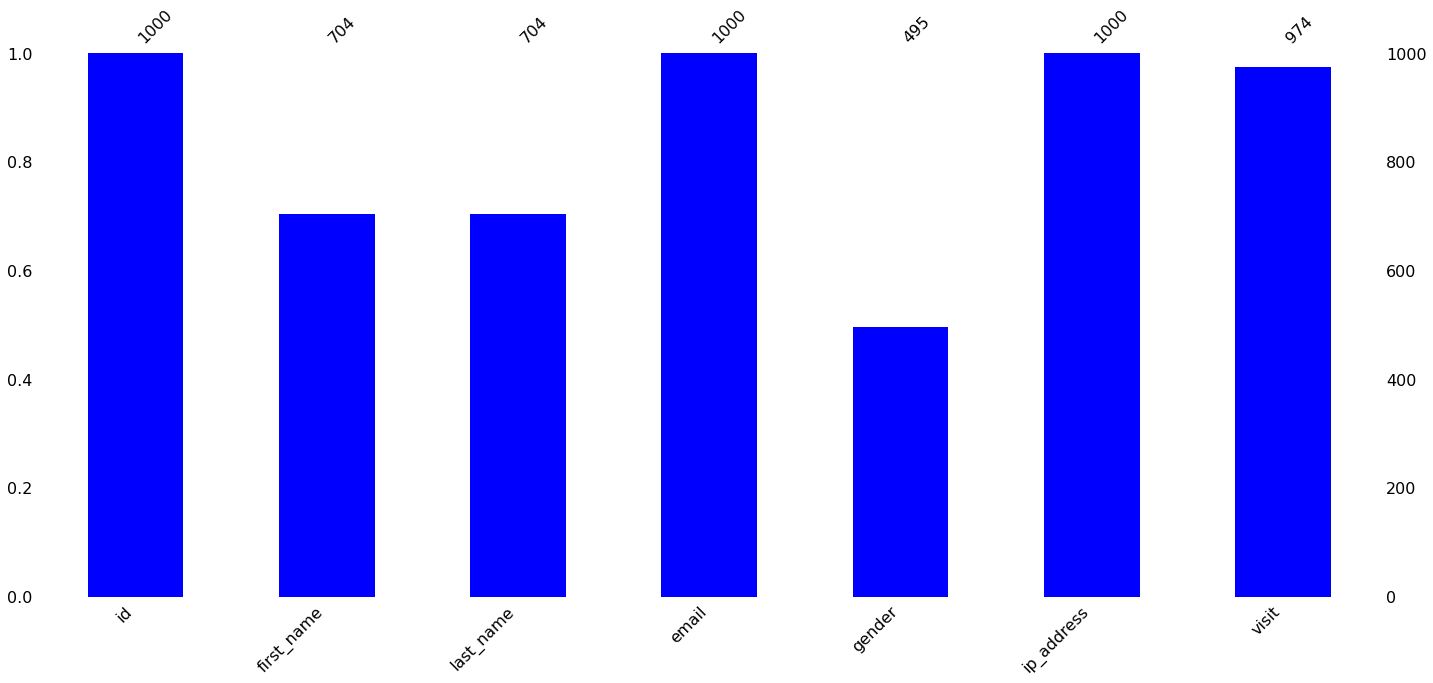

In [34]:
# display column with nan values for entire df

import missingno as msno

msno.bar(visits, color='b');


# there are 4 columns with missing or nan values

In [35]:
# remove missing data or nan values from visit columns since it has lower nan values and this can be treated as outliers

visits_no_nan = visits.dropna(subset=['visit'])

In [36]:
# display shape and head of new df with no nan values

visits_no_nan.shape
visits_no_nan.head()


# there were around 663 rows with nan values in original dataset so removed 26 rows from visit column

(974, 7)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [37]:
# display dataset size difference between two datasets

print(f'The original dataset have total rows: {visits.shape[0]} and dataset after removing outliers have total rows: {visits_no_nan.shape[0]}, the dataset size difference is:{visits.shape[0]-visits_no_nan.shape[0]} rows')

The original dataset have total rows: 1000 and dataset after removing outliers have total rows: 974, the dataset size difference is:26 rows


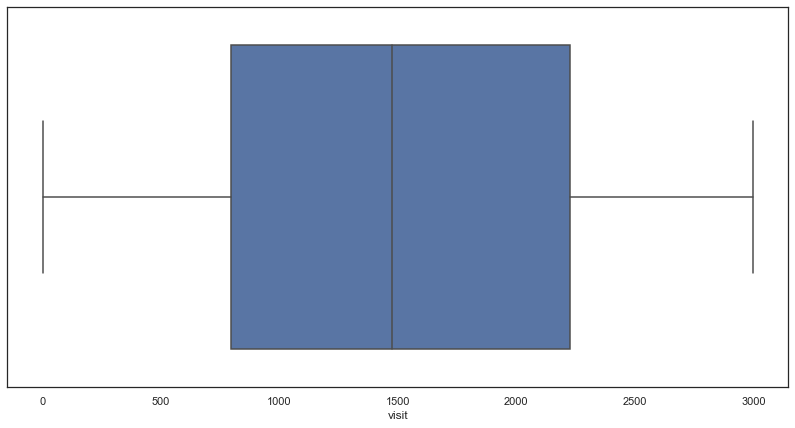

In [38]:
# display outliers in the dataset for visit column using box-plot

plt.figure(figsize=(14,7))

sns.set(style='white')
sns.boxplot(data=visits_no_nan, x = 'visit');

# based on box plot , we dont see any outliers in visit column, not data outside min and max 

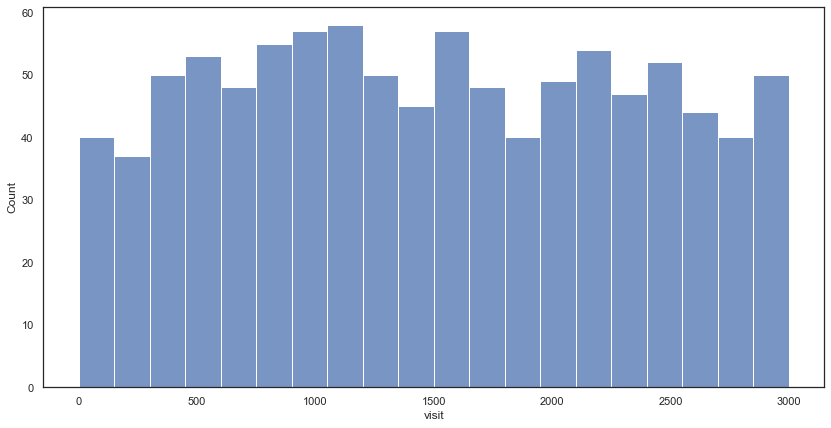

In [39]:
# display outliers by plotting histplot for visit column

plt.figure(figsize=(14,7))
sns.histplot(data=visits_no_nan, x='visit', bins=20);

# there are no outliers in visit column

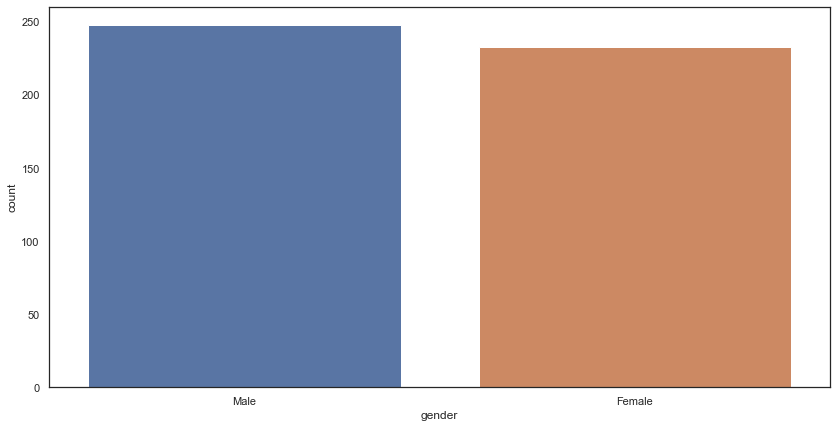

In [40]:
# see distribution of gender column to see any outlier or unexpected value

plt.figure(figsize=(14,7))

sns.countplot(data=visits_no_nan, x = 'gender');

# it seems no outlier or unexpected value in gender column

## END

### Exercise-3

In [41]:
# import the sqlite package

import sqlite3

In [42]:
# define query to create table

query = '''create table temp 
        (name varchar(30), address varchar(100), city varchar(20), state varchar(20), zip integer, phone_num varchar(15))
'''

In [43]:
# establish connection to sqlite db

con = sqlite3.connect('mydata.sqlite')

In [47]:
# run the query on sqllite db

con.execute(query)

In [48]:
# commit the last command on db

con.commit()

In [49]:
# create data to insert into newly created table

data = [('john','101 Main St','New York','NY', 10001, "211-101-1001"),
      ('adam','9400 wade blvd','Frisco','TX', 75035, "469-202-1001"),
       ('mike','302 Cedar Dr','Wilmington','DE', 19801, "610-303-1001"),
       ('bob','1832 Preston Rd','Plano','TX', 75027, "932-404-1001"),
       ('jason','201 Central Ave','Phoenix','AZ', 85001, "602-505-1001"),
       ('steve','300 W Columnbus Dr','Phoenix','AZ', 85035, "602-606-1001"),
       ('jeff','1900 Ohio Dr','Plano','TX', 75024, "332-707-1001"),
       ('carl','1901 Nemaans Rd','Wilmington','DE', 19011, "445-808-1001"),
       ('tony','1734 Parkwood dr','Dover','DE', 19810, "302-909-1001"),
       ('paul','404 Manhatten Rd','New York','NY', 10011, "214-100-1001")]

In [50]:
# insert statement to run on new table

stmt = "INSERT INTO temp VALUES(?, ?, ?, ?, ?, ?)"

In [51]:
# run insert statement repeatendly

con.executemany(stmt, data)

In [52]:
# commit the insert stement command on db

con.commit()

In [53]:
# create cursor to fetch reconds from the new table

cursor = con.execute('select * from temp')

In [54]:
# fetch rows from the table

rows = cursor.fetchall()

In [55]:
# display the rows fetched from table

rows

[('john', '101 Main St', 'New York', 'NY', 10001, '211-101-1001'),
 ('adam', '9400 wade blvd', 'Frisco', 'TX', 75035, '469-202-1001'),
 ('mike', '302 Cedar Dr', 'Wilmington', 'DE', 19801, '610-303-1001'),
 ('bob', '1832 Preston Rd', 'Plano', 'TX', 75027, '932-404-1001'),
 ('jason', '201 Central Ave', 'Phoenix', 'AZ', 85001, '602-505-1001'),
 ('steve', '300 W Columnbus Dr', 'Phoenix', 'AZ', 85035, '602-606-1001'),
 ('jeff', '1900 Ohio Dr', 'Plano', 'TX', 75024, '332-707-1001'),
 ('carl', '1901 Nemaans Rd', 'Wilmington', 'DE', 19011, '445-808-1001'),
 ('tony', '1734 Parkwood dr', 'Dover', 'DE', 19810, '302-909-1001'),
 ('paul', '404 Manhatten Rd', 'New York', 'NY', 10011, '214-100-1001')]

In [56]:
# create table column names list

col_names = []

for col in cursor.description:
    col_names.append(col[0])

In [57]:
# display column names

col_names

['name', 'address', 'city', 'state', 'zip', 'phone_num']

In [58]:
# create dataframe usinf rows from the table

sqlite_df = pd.DataFrame(data=rows, columns=col_names)

In [59]:
# display dataframe shape and top 5 rows

sqlite_df.shape
sqlite_df

(10, 6)

,name,address,city,state,zip,phone_num
0,john,101 Main St,New York,NY,10001,211-101-1001
1,adam,9400 wade blvd,Frisco,TX,75035,469-202-1001
2,mike,302 Cedar Dr,Wilmington,DE,19801,610-303-1001
3,bob,1832 Preston Rd,Plano,TX,75027,932-404-1001
4,jason,201 Central Ave,Phoenix,AZ,85001,602-505-1001
5,steve,300 W Columnbus Dr,Phoenix,AZ,85035,602-606-1001
6,jeff,1900 Ohio Dr,Plano,TX,75024,332-707-1001
7,carl,1901 Nemaans Rd,Wilmington,DE,19011,445-808-1001
8,tony,1734 Parkwood dr,Dover,DE,19810,302-909-1001
9,paul,404 Manhatten Rd,New York,NY,10011,214-100-1001


In [60]:
# close the db connection

con.close()

### END